In [1]:
import os
import torch

from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset

class ImageNetSubset(Dataset):
    def __init__(self):
        self.root = os.path.join('..', 'data', 'ImageNetSubset')
        self.file_names = sorted(
            f for f in os.listdir(self.root)
            if f.lower().endswith(('.jpg', '.jpeg', '.png'))
        )
        self.labels_map = {
            'coffee-mug': 0,
            'notebook': 1,
            'remote-control': 2,
            'soup-bowl': 3,
            'teapot': 4,
            'wooden-spoon': 5,
            'computer-keyboard': 6,
            'mouse': 7,
            'binder': 8,
            'toilet-tissue': 9,
        }

        self.transform = transforms.Compose(
            [
                # maybe also: data augmentation, normalization
                transforms.Resize(size=(256, 192)),
                transforms.ToTensor(),
            ]
        )
        
    
    def __getitem__(self, idx):
        img_name = self.file_names[idx]
        img_path = os.path.join(self.root, img_name)

        label_str = img_name.split('_')[0]
        label = torch.tensor(self.labels_map[label_str], dtype=torch.long)

        image = Image.open(img_path).convert("RGB")
        image = self.transform(image)

        return image, label
    
    def __len__(self):
        return len(self.file_names)

Feature batch shape: torch.Size([64, 3, 256, 192])
Labels batch shape: torch.Size([64])


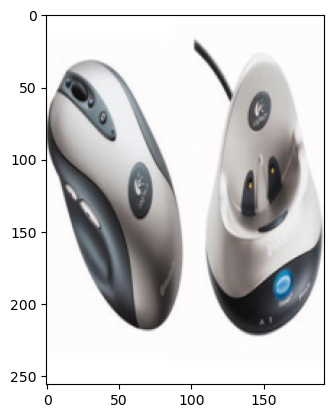

Label: 7


In [2]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

subset = ImageNetSubset()
train_dataloader = DataLoader(subset, batch_size=64, shuffle=True)

# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

# from (C, H, W) to (H, W, C)
img = train_features[0].permute(1, 2, 0)
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")